In [1]:
#libraries importing
from mpl_toolkits.mplot3d import Axes3D #plotting
from sklearn.preprocessing import StandardScaler #normalize, scalling
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [46]:
train=pd.read_csv('C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation/DDoSdata.csv')

C:\Users\dpatel112\AppData\Local\Temp\ipykernel_21372\127305798.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation/DDoSdata.csv')


In [47]:
train.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [3]:
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation\CS5470_final_project.pdf
C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation\DDoSdata.csv
C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation\DDoSdata.csv.zip
C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation\List of Groups for CS5470 Term Project.docx
C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation\Smart Home Automation System - DDoS Detection for IoT Networks_1.pptx
C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation\Smart Home Automation System - DDoS Detection for IoT Networks​1 - Copy - Copy.pptx
C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation\Smart Home Automation System - DDoS Detection for IoT Networks​1 - Copy.pptx
C:/Users/dpatel112/OneDriv

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# DDoSdata.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation/DDoSdata.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'DDoSdata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 47 columns


In [7]:
df1.head(5)

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1000 non-null   int64  
 1   pkSeqID                           1000 non-null   int64  
 2   stime                             1000 non-null   float64
 3   flgs                              1000 non-null   object 
 4   flgs_number                       1000 non-null   int64  
 5   proto                             1000 non-null   object 
 6   proto_number                      1000 non-null   int64  
 7   saddr                             1000 non-null   object 
 8   sport                             1000 non-null   int64  
 9   daddr                             1000 non-null   object 
 10  dport                             1000 non-null   int64  
 11  pkts                              1000 non-null   int64  
 12  bytes  

In [14]:
df1.columns

Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

In [18]:
df1['pkts']

0      10
1      10
2       8
3       8
4       8
       ..
995     6
996     6
997     6
998     6
999     6
Name: pkts, Length: 1000, dtype: int64

In [24]:
import csv

with open('C:/Users/dpatel112/OneDrive - Cal State LA/Spring 2023/CS5470 Computer Network/Presentation/DDoSdata.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    rows_with_1_1 = []
    count = 0
    for row in csv_reader:
        if row['saddr'] == '192.168.100.150':
            rows_with_1_1.append(row)
            count += 1
            if count == 5:
                break
print(rows_with_1_1)


[{'': '1650261', 'pkSeqID': '1650261', 'stime': '1528102921.34461', 'flgs': 'e', 'flgs_number': '1', 'proto': 'tcp', 'proto_number': '1', 'saddr': '192.168.100.150', 'sport': '54110', 'daddr': '192.168.100.3', 'dport': '80', 'pkts': '10', 'bytes': '1729', 'state': 'RST', 'state_number': '1', 'ltime': '1528102927.75104', 'seq': '20', 'dur': '6.4064239999999995', 'mean': '0.679473', 'stddev': '0.544126', 'sum': '1.358946', 'min': '0.135347', 'max': '1.2235989999999999', 'spkts': '6', 'dpkts': '4', 'sbytes': '963', 'dbytes': '766', 'rate': '1.4048399999999999', 'srate': '0.780467', 'drate': '0.46828000000000003', 'TnBPSrcIP': '56864', 'TnBPDstIP': '59969', 'TnP_PSrcIP': '308', 'TnP_PDstIP': '328', 'TnP_PerProto': '328', 'TnP_Per_Dport': '700', 'AR_P_Proto_P_SrcIP': '1.26889', 'AR_P_Proto_P_DstIP': '1.21662', 'N_IN_Conn_P_DstIP': '40', 'N_IN_Conn_P_SrcIP': '38', 'AR_P_Proto_P_Sport': '1.56093', 'AR_P_Proto_P_Dport': '1.21662', 'Pkts_P_State_P_Protocol_P_DestIP': '328', 'Pkts_P_State_P_Prot

In [53]:
desired_columns = ['stime', 'saddr', 'daddr', 'pkts', 'spkts', 'dpkts', 'attack', 'category']
selected_data = df1.loc[:, desired_columns]
selected_data

,stime,saddr,daddr,pkts,spkts,dpkts,attack,category
0,1.528103e+09,192.168.100.150,192.168.100.3,10,6,4,1,DDoS
1,1.528103e+09,192.168.100.150,192.168.100.3,10,6,4,1,DDoS
2,1.528103e+09,192.168.100.150,192.168.100.3,8,5,3,1,DDoS
3,1.528103e+09,192.168.100.150,192.168.100.3,8,5,3,1,DDoS
4,1.528103e+09,192.168.100.150,192.168.100.3,8,5,3,1,DDoS
...,...,...,...,...,...,...,...,...
995,1.528096e+09,192.168.100.147,192.168.100.3,6,4,2,1,DDoS
996,1.528096e+09,192.168.100.147,192.168.100.3,6,4,2,1,DDoS
997,1.528096e+09,192.168.100.147,192.168.100.3,6,4,2,1,DDoS
998,1.528096e+09,192.168.100.147,192.168.100.3,6,4,2,1,DDoS


In [58]:
from sklearn.model_selection import train_test_split
x = df1[desired_columns]  
print(x.shape)

(1000, 8)


In [61]:
y = df1['subcategory']
y[::10].tail()

950    HTTP
960    HTTP
970    HTTP
980    HTTP
990     TCP
Name: subcategory, dtype: object

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
df1.shape

(1000, 47)

In [39]:
def plot_bars(col):
    
    import matplotlib.pyplot as plt 
    from matplotlib.pyplot import figure

    figure(figsize=(14, 8), dpi=80)
    plt.xticks(rotation = 90)
    
    D = df1[col].value_counts(normalize=True).to_dict()

    plt.bar(*zip(*D.items()))
    plt.show()

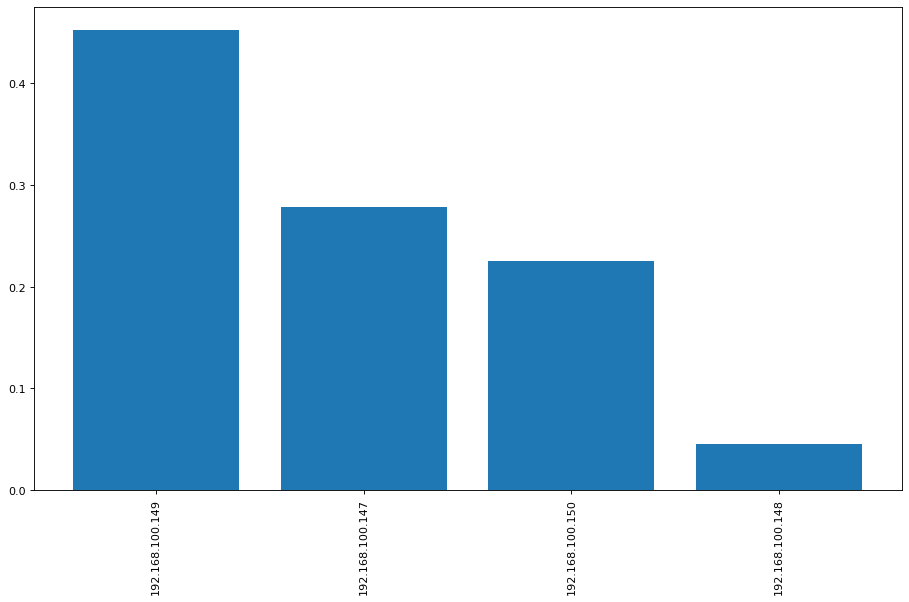

In [41]:
plot_bars('saddr')

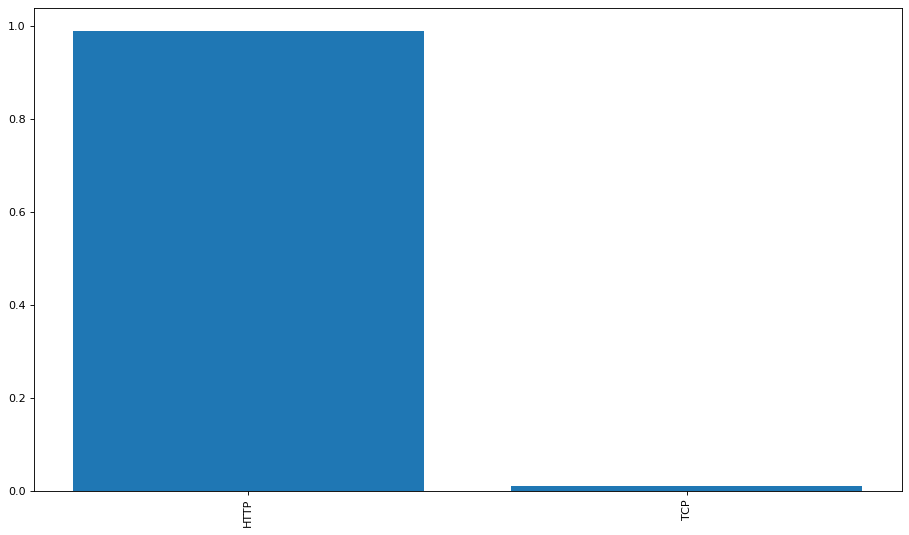

In [44]:
plot_bars('subcategory')